# Student Performance Indicator Project

#### General Steps to Follow

1. Problem Statement
2. Data Collection
3. Checking the Data
4. Exploratory Data Analysis(EDA)
5. Data Pre-Processing
6. Model Training
7. Choose best model

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 1) Problem statement
- Predict the student's performance on test scores given some features such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of **8 features** and **1000 training example**.

### 2.1 Import Data and Required Packages

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import the CSV Data as Pandas DataFrame

In [13]:
data_original = pd.read_csv("../../data/StudentsPerformance.csv")

#### Visualizing the top 8 Records

In [14]:
data_original.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


#### Shape of the dataset

In [15]:
data_original.shape

(1000, 8)

In [16]:
data_original['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

### --------------------------------------------------------------------------------

### 2.2 Dataset information

You will find below the feature name as well as its values
- gender: Male/female
- race/ethnicity: (Group A, B,C, D,E)
- Parental level of education: bachelor's degree, some college, master's degree, associate's degree, high school, some high school 
- lunch: standard, free/reduced) 
- test preparation course : completed, none
- math score: integer values
- reading score: integer values
- writing score: integer values

#### Some Comments
* In "Parental level of education" feature, there're two **similar** values: high school, some high school
* There are three types of tests: math, reading, writing. Maybe you should consider the **total score**

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Checking the Data

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [17]:
data_original.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Some Comments
* No missing values

### --------------------------------------------------------------------------------

### 3.2 Check Duplicates

In [18]:
# check if there are similar rows
data_original.duplicated().sum()

0

#### Some Comments
* No duplicated values

### --------------------------------------------------------------------------------

### 3.3 Check data types

In [19]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Some Comments
* Three integer value features: the scores of the tests, and the rest are objects

### --------------------------------------------------------------------------------

### 3.4 Checking the number of unique values for each feature

In [20]:
data_original.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### --------------------------------------------------------------------------------

### 3.5 Defining numerical & categorical columns

In [21]:
categorical_features = []
numerical_features = []

for x in data_original:
    if data_original[x].dtype == 'O':
        categorical_features.append(x)
    else:
        numerical_features.append(x)

In [22]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [23]:
numerical_features

['math score', 'reading score', 'writing score']

### --------------------------------------------------------------------------------

### 3.6 Adding more Features

#### I will add the total score and the average score of each student

In [24]:
data_original["total_score"] = data_original["math score"]+data_original["reading score"]+data_original["writing score"]

In [25]:
data_original["average_score"] = data_original["total_score"]/3

In [26]:
data_original.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Exploratory Data Analysis(EDA)

In [27]:
data_original.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### 4.1 Check statistics of data set

In [28]:
data_original.describe()

,math score,reading score,writing score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


### 4.1.1 Statistics for the tests' scores

In [29]:
num_students = data_original.shape[0]

n = data_original[data_original["math score"] == 100].shape[0]
print("Number of students who scored 100 in Math:", n)

n = data_original[data_original["reading score"] == 100].shape[0]
print("Number of students who scored 100 in Reading:", n)

n = data_original[data_original["writing score"] == 100].shape[0]
print("Number of students who scored 100 in Writing:", n)

n = data_original[data_original["total_score"] == 300].shape[0]
print("Number of students who scored 100 in All:", n)

print("--------------------------------------------------")
#-----------------------------------------------------------------------

n = data_original[data_original["math score"] < 50].shape[0]
print("Number of students who failed/succeeded in Math:", n, num_students-n)

n = data_original[data_original["reading score"] < 50].shape[0]
print("Number of students who failed/succeeded in Reading:", n, num_students-n)

n = data_original[data_original["writing score"] < 50].shape[0]
print("Number of students who failed/succeeded in Writing:", n, num_students-n)

n = data_original[data_original["total_score"] < 150].shape[0]
print("Number of students who failed/succeeded in All:", n, num_students-n)


print("--------------------------------------------------")
#-----------------------------------------------------------------------

print("Males:")
cond2 = data_original["gender"] == "male"

cond1 = data_original["math score"] < 50
n = data_original[cond1 & cond2].shape[0]
print("Number of students who failed/succeeded in Math:", n, num_students-n)

ncond1 = data_original["reading score"] < 50
n = data_original[cond1 & cond2].shape[0]
print("Number of students who failed/succeeded in Reading:", n, num_students-n)

cond1 = data_original["writing score"] < 50
n = data_original[cond1 & cond2].shape[0]
print("Number of students who failed/succeeded in Writing:", n, num_students-n)

cond1 = data_original["total_score"] < 150
n = data_original[cond1 & cond2].shape[0]
print("Number of students who failed/succeeded in All:", n, num_students-n)

print("--------------------------------------------------")
#-----------------------------------------------------------------------

print("Females:")
cond2 = data_original["gender"] == "female"

cond1 = data_original["math score"] < 50
n = data_original[cond1 & cond2].shape[0]
print("Number of students who failed/succeeded in Math:", n, num_students-n)

ncond1 = data_original["reading score"] < 50
n = data_original[cond1 & cond2].shape[0]
print("Number of students who failed/succeeded in Reading:", n, num_students-n)

cond1 = data_original["writing score"] < 50
n = data_original[cond1 & cond2].shape[0]
print("Number of students who failed/succeeded in Writing:", n, num_students-n)

cond1 = data_original["total_score"] < 150
n = data_original[cond1 & cond2].shape[0]
print("Number of students who failed/succeeded in All:", n, num_students-n)

Number of students who scored 100 in Math: 7
Number of students who scored 100 in Reading: 17
Number of students who scored 100 in Writing: 14
Number of students who scored 100 in All: 3
--------------------------------------------------
Number of students who failed/succeeded in Math: 135 865
Number of students who failed/succeeded in Reading: 90 910
Number of students who failed/succeeded in Writing: 114 886
Number of students who failed/succeeded in All: 103 897
--------------------------------------------------
Males:
Number of students who failed/succeeded in Math: 49 951
Number of students who failed/succeeded in Reading: 49 951
Number of students who failed/succeeded in Writing: 83 917
Number of students who failed/succeeded in All: 64 936
--------------------------------------------------
Females:
Number of students who failed/succeeded in Math: 86 914
Number of students who failed/succeeded in Reading: 86 914
Number of students who failed/succeeded in Writing: 31 969
Number of

#### Some Comments
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17
- Best performance is in reading test
- Worst performance is in math test
- Males did better in Math and Reading tests
- Females did better in Writing test
- However, overall males failed more than females

### 4.1.2 Statistics for the tests' scores based on gender

* Average Score

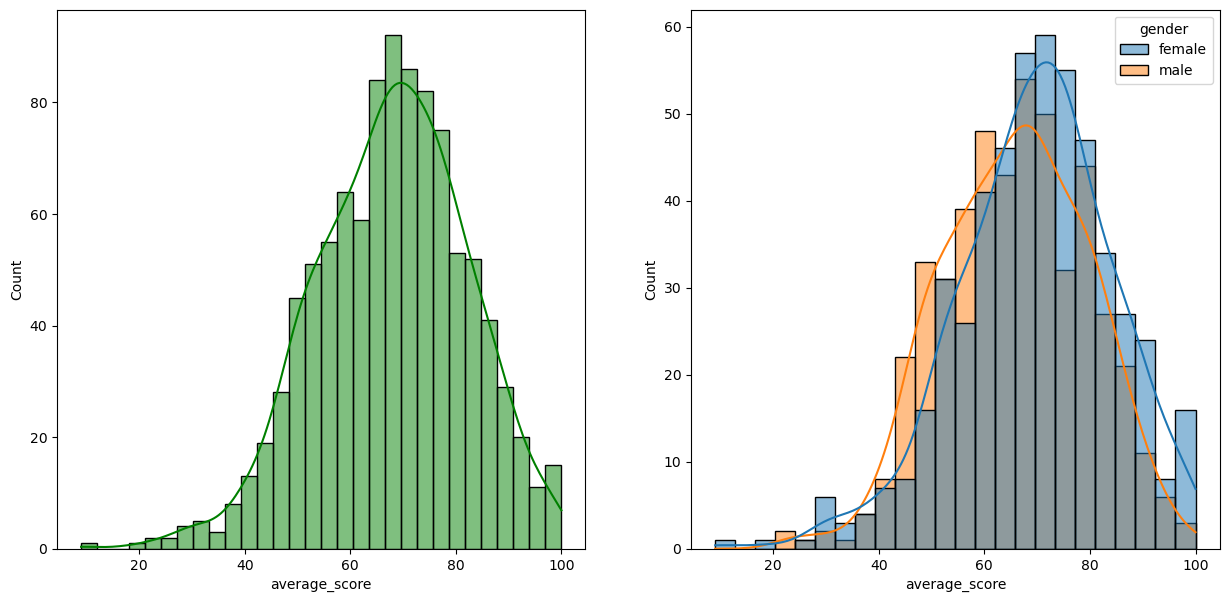

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = data_original, x = 'average_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = data_original, x = 'average_score', kde = True, hue = 'gender')
plt.show()

* Total Score

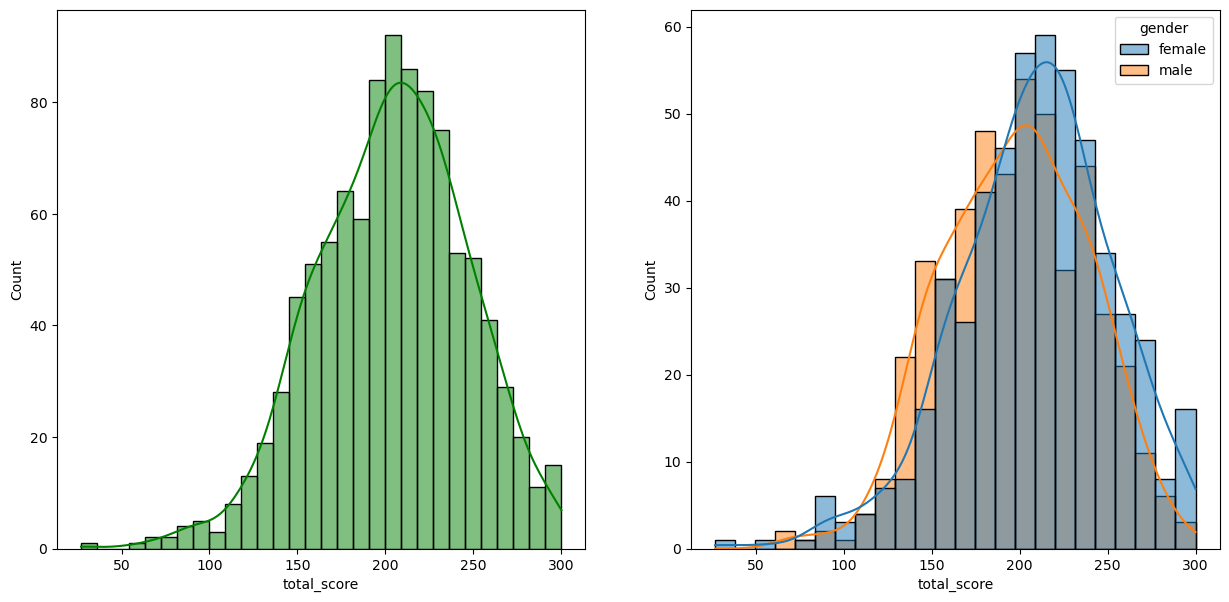

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = data_original,x = 'total_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = data_original, x = 'total_score', kde = True, hue = 'gender')
plt.show()

#### Some Comments
* In general, Females performs better

### 4.1.3 Statistics for having lunch before exam

In [32]:
data_original["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

#### Total and Average scores (Gender not considered)

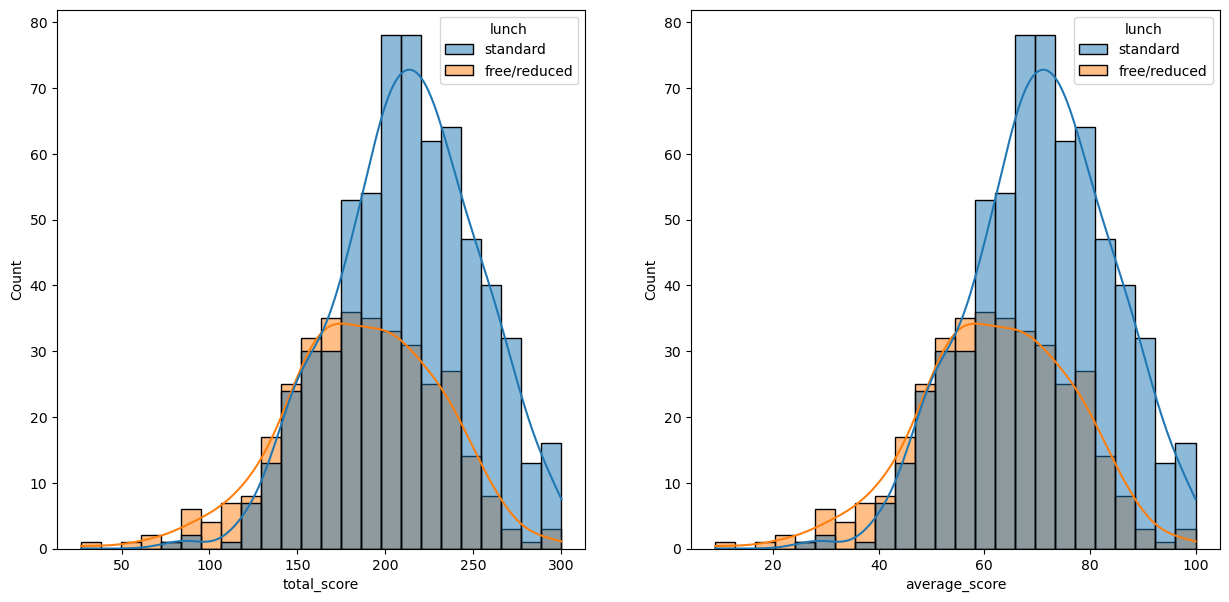

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original,x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(121)
sns.histplot(data = data_original,x = 'total_score', kde = True, hue = 'lunch')
plt.subplot(122)
plt.show()

#### Total and Average scores (Males)

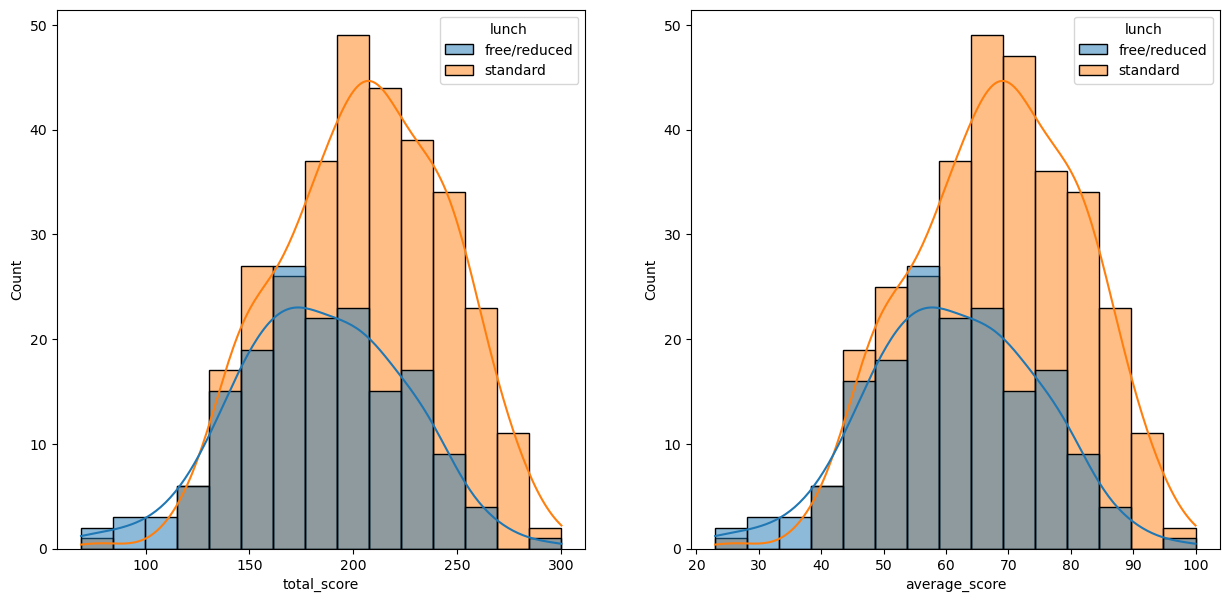

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original[data_original.gender == "male"],x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(121)
sns.histplot(data = data_original[data_original.gender == "male"],x = 'total_score', kde = True, hue = 'lunch')
plt.subplot(122)
plt.show()

#### Total and Average scores (Females)

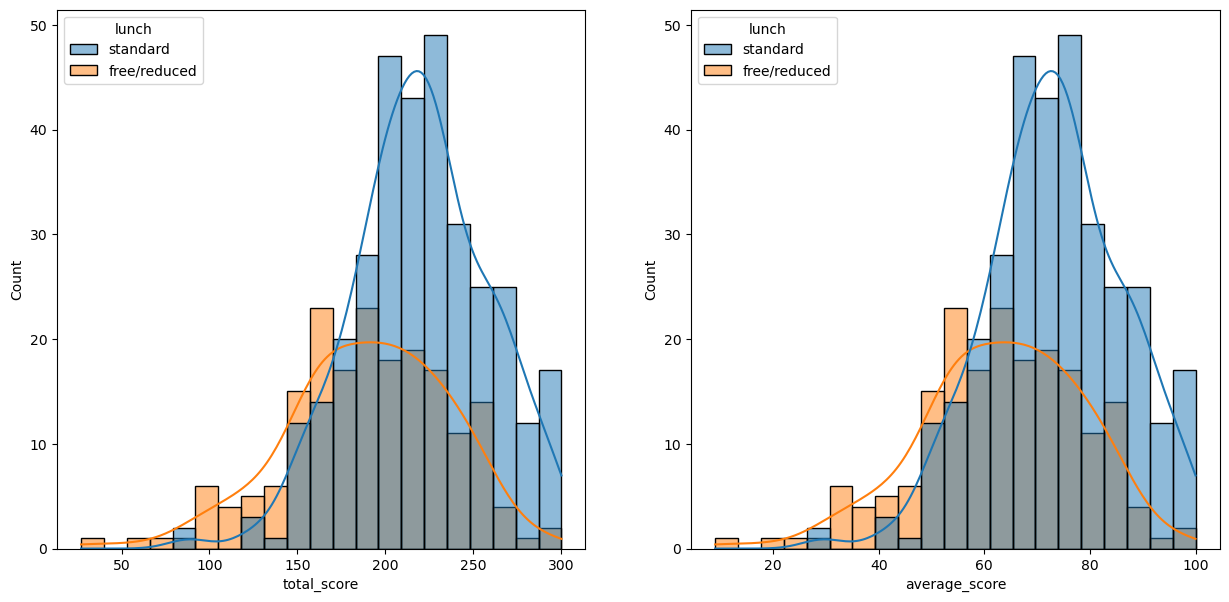

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original[data_original.gender == "female"],x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(121)
sns.histplot(data = data_original[data_original.gender == "female"],x = 'total_score', kde = True, hue = 'lunch')
plt.subplot(122)
plt.show()

#### Some Comments
- Students who eat lunch before exam performs better regardless their gender

### 4.1.4 Statistics for parental level of education

#### Total and Average scores (Gender not considered)

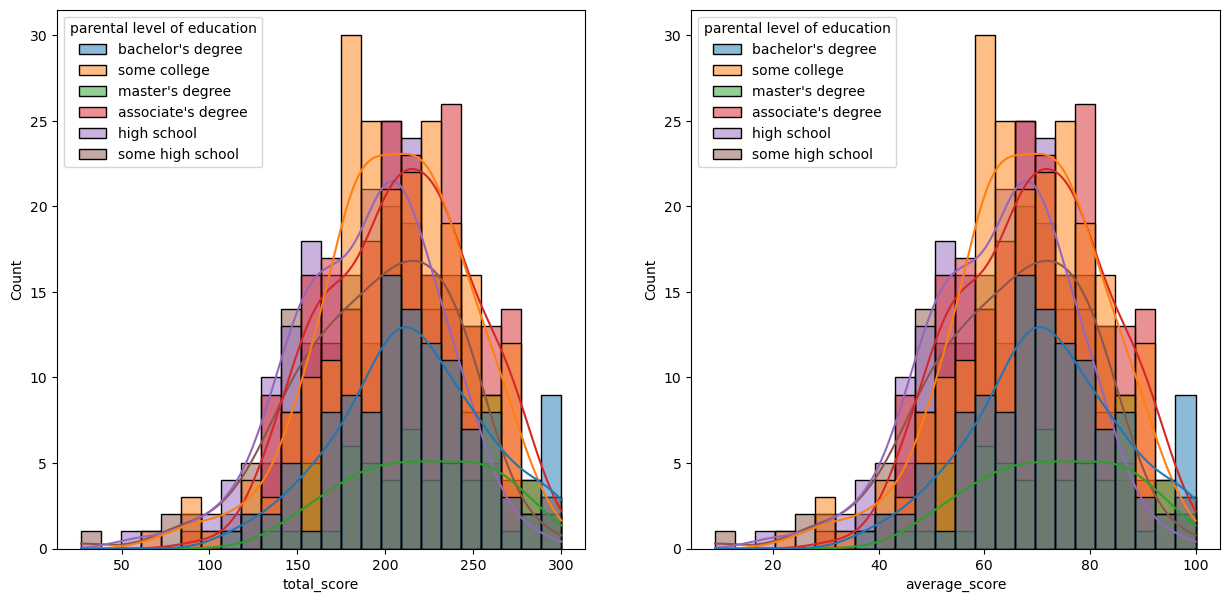

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original,x = 'average_score', kde = True, hue = 'parental level of education')
plt.subplot(121)
sns.histplot(data = data_original,x = 'total_score', kde = True, hue = 'parental level of education')
plt.subplot(122)
plt.show()

#### Total and Average scores (Males)

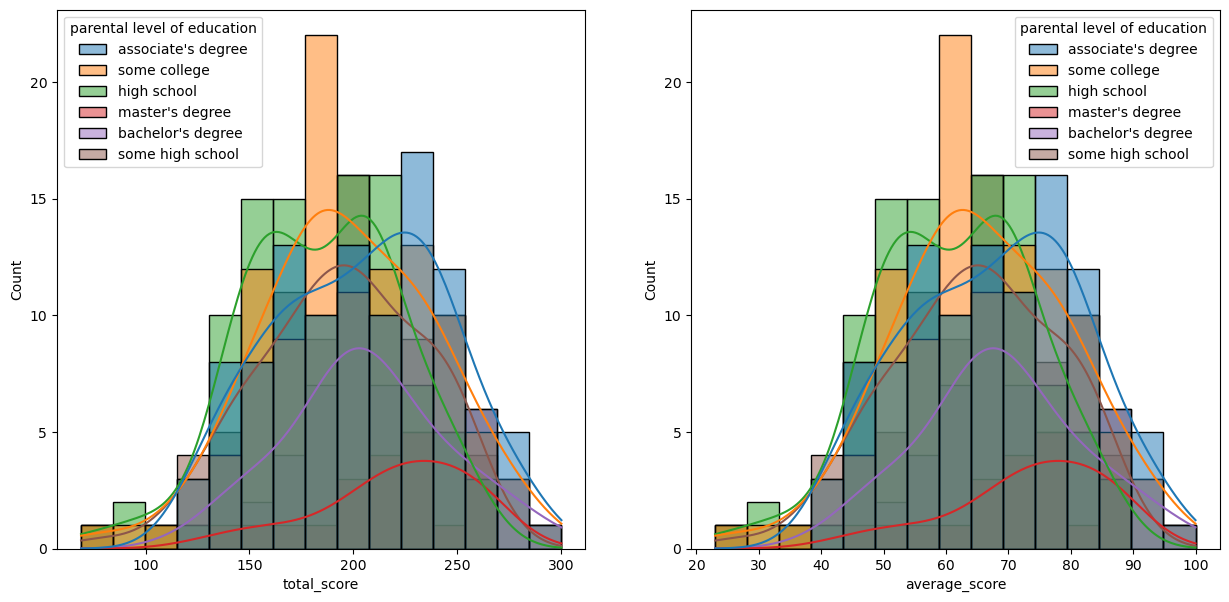

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original[data_original.gender == "male"],x = 'average_score', kde = True, hue = 'parental level of education')
plt.subplot(121)
sns.histplot(data = data_original[data_original.gender == "male"],x = 'total_score', kde = True, hue = 'parental level of education')
plt.subplot(122)
plt.show()

#### Total and Average scores (Females)

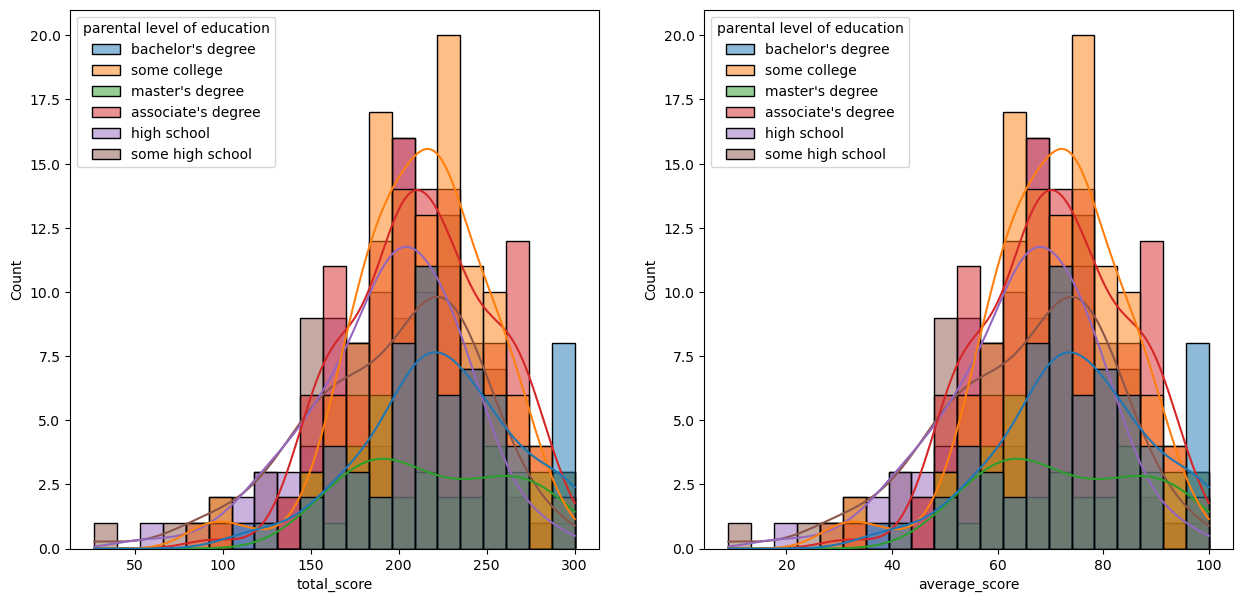

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original[data_original.gender == "female"],x = 'average_score', kde = True, hue = 'parental level of education')
plt.subplot(121)
sns.histplot(data = data_original[data_original.gender == "female"],x = 'total_score', kde = True, hue = 'parental level of education')
plt.subplot(122)
plt.show()

### 4.1.4 Statistics for race

#### Total and Average scores (Gender not considered)

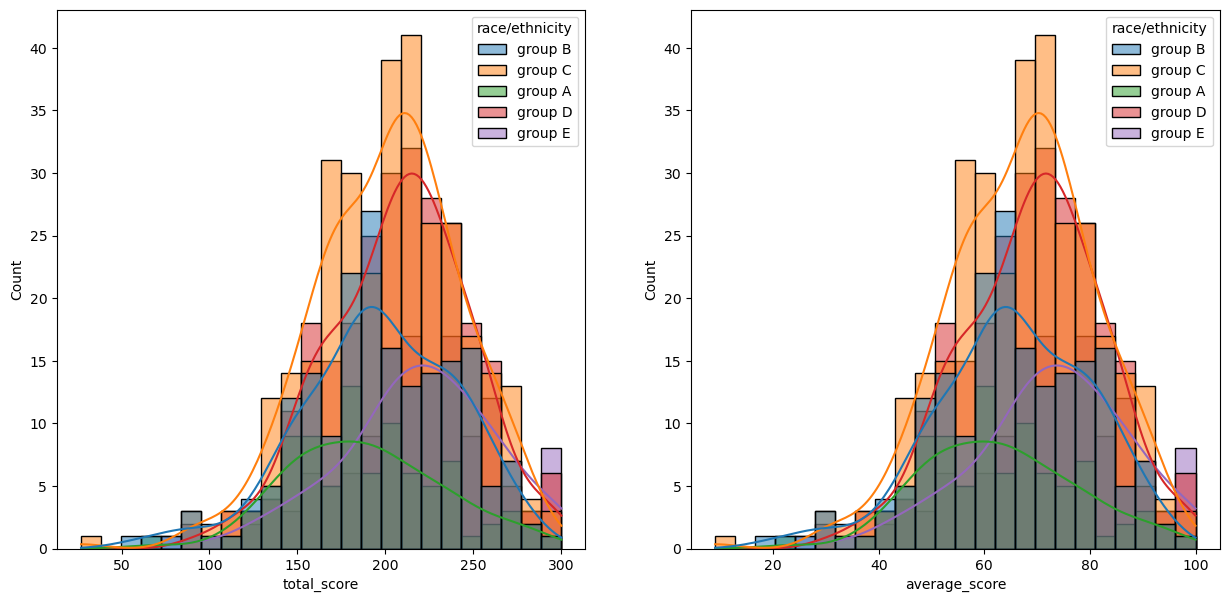

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original,x = 'average_score', kde = True, hue = 'race/ethnicity')
plt.subplot(121)
sns.histplot(data = data_original,x = 'total_score', kde = True, hue = 'race/ethnicity')
plt.subplot(122)
plt.show()

#### Total and Average scores (Males)

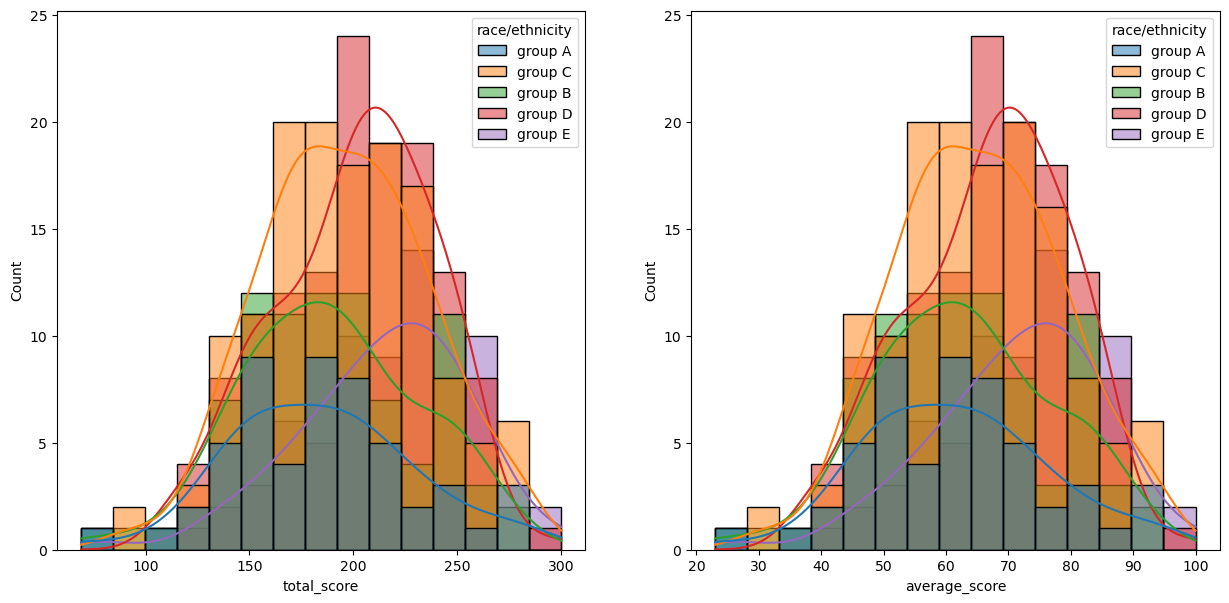

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original[data_original.gender == "male"],x = 'average_score', kde = True, hue = 'race/ethnicity')
plt.subplot(121)
sns.histplot(data = data_original[data_original.gender == "male"],x = 'total_score', kde = True, hue = 'race/ethnicity')
plt.subplot(122)
plt.show()

#### Total and Average scores (Females)

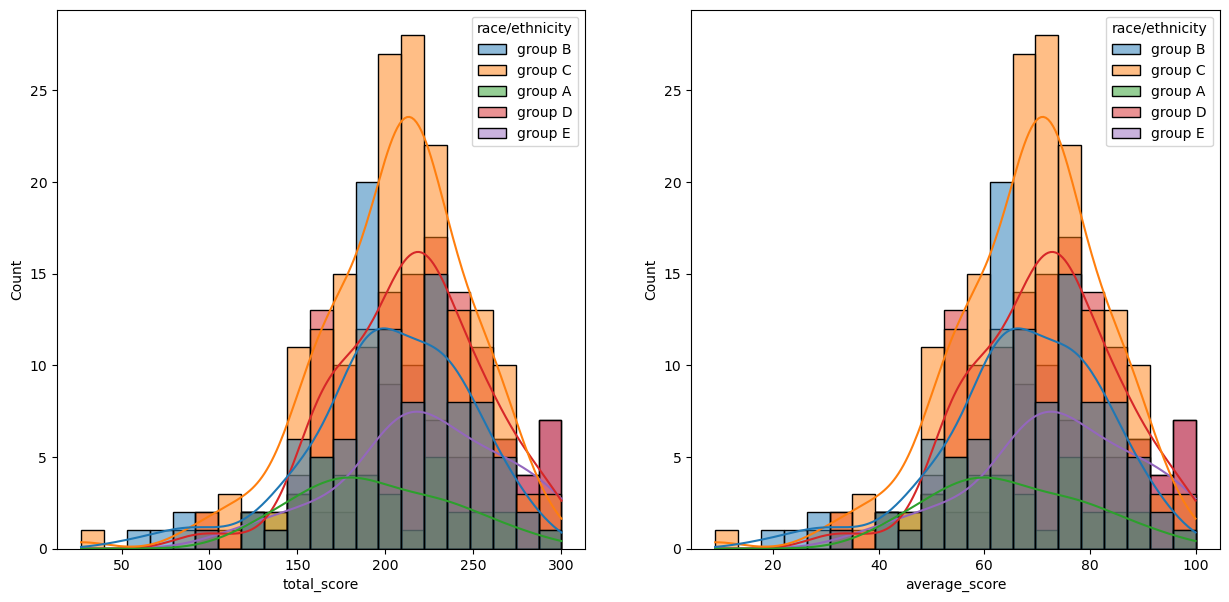

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original[data_original.gender == "female"],x = 'average_score', kde = True, hue = 'race/ethnicity')
plt.subplot(121)
sns.histplot(data = data_original[data_original.gender == "female"],x = 'total_score', kde = True, hue = 'race/ethnicity')
plt.subplot(122)
plt.show()

### 4.1.5 Statistics for test preparation course

#### Total and Average scores (Gender not considered)

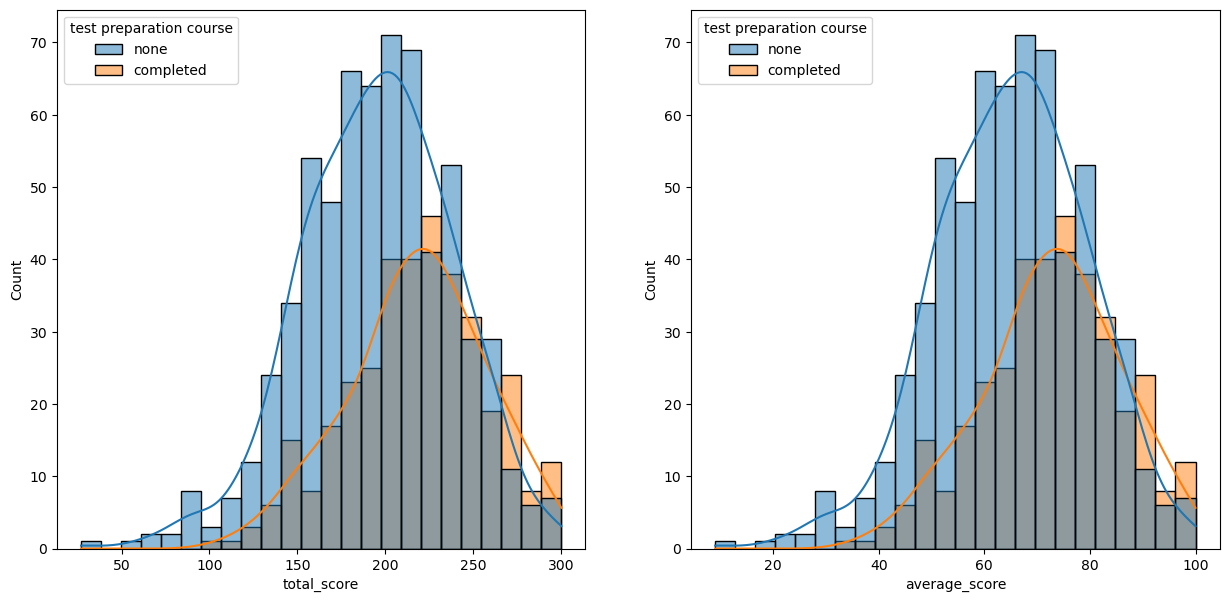

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original,x = 'average_score', kde = True, hue = 'test preparation course')
plt.subplot(121)
sns.histplot(data = data_original,x = 'total_score', kde = True, hue = 'test preparation course')
plt.subplot(122)
plt.show()

#### Total and Average scores (Males)

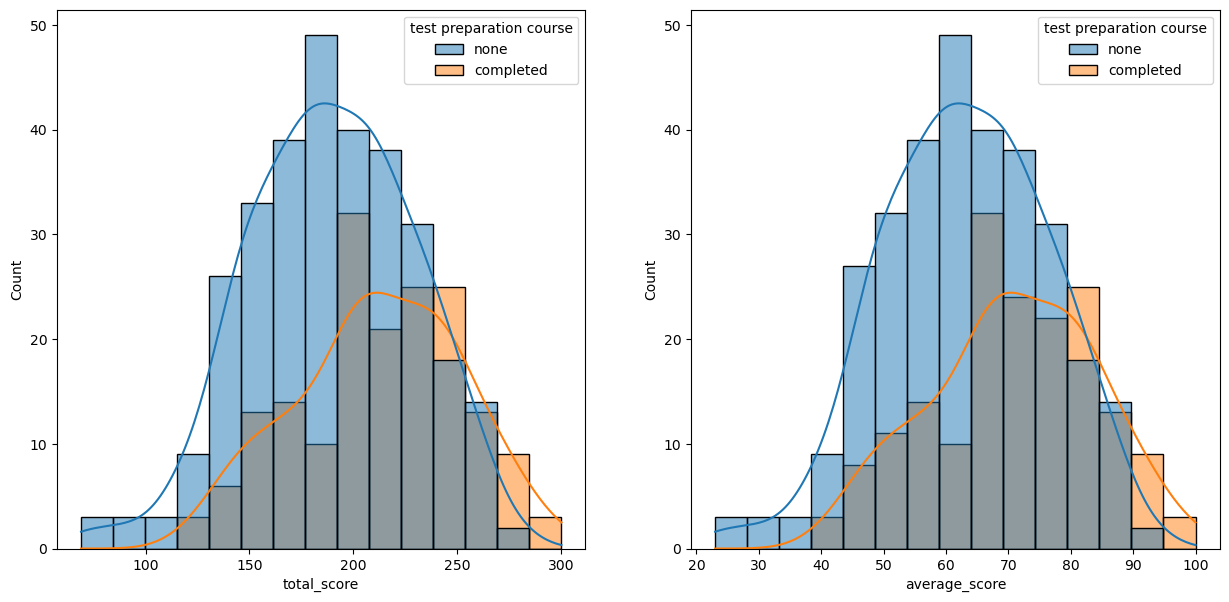

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original[data_original.gender == "male"],x = 'average_score', kde = True, hue = 'test preparation course')
plt.subplot(121)
sns.histplot(data = data_original[data_original.gender == "male"],x = 'total_score', kde = True, hue = 'test preparation course')
plt.subplot(122)
plt.show()

#### Total and Average scores (Females)

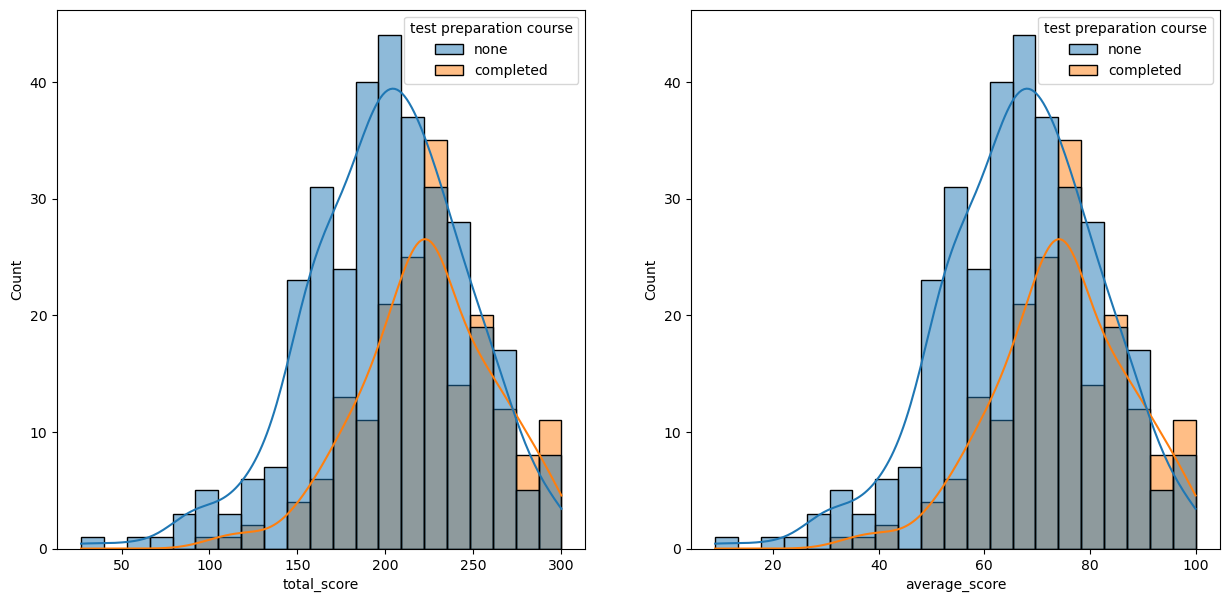

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data = data_original[data_original.gender == "female"],x = 'average_score', kde = True, hue = 'test preparation course')
plt.subplot(121)
sns.histplot(data = data_original[data_original.gender == "female"],x = 'total_score', kde = True, hue = 'test preparation course')
plt.subplot(122)
plt.show()

#### Some Comments
* Students who didn't take the preparation course performed better regardless their gender

### --------------------------------------------------------------------------------

### 4.2 Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

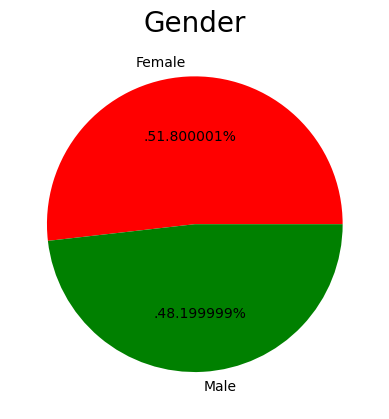

In [45]:
size = data_original['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

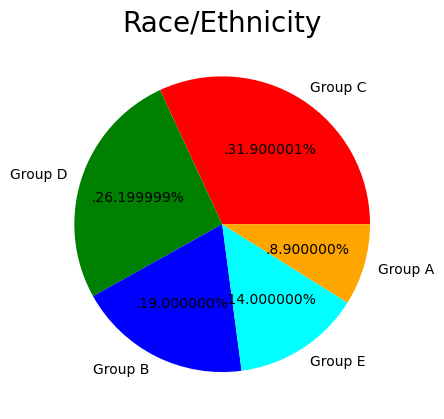

In [46]:
size = data_original['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

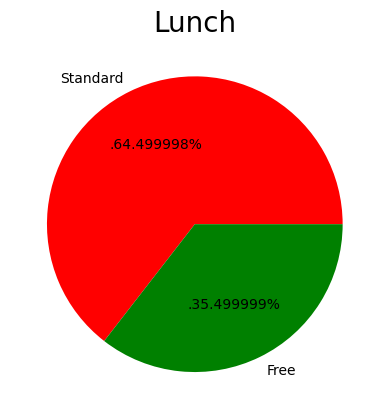

In [47]:
size = data_original['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

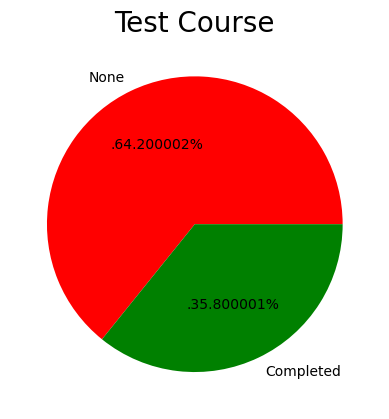

In [48]:
size = data_original['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

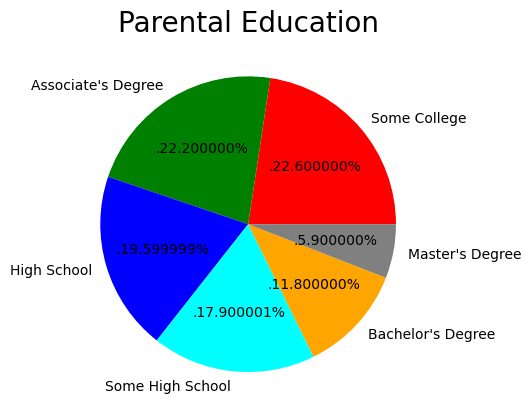

In [49]:
size = data_original['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

####  Some Comments
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# Saving the modified DataFrame

In [53]:
data_original.to_csv("../../data/StudentsPerformanceModified.csv", index = False) #Just added the total and average scores